# Traffic data

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib as plt
from mpl_toolkits.basemap import Basemap

## List of abbreviations, related to the traffic jam dataset
Since there are quite a few abbreviations, related to this traffic dataset, we decided to create this list which contains more information about the meaning of each abbreviation. The list is sorted in ascending alphabetical order.

* **DATEX** - Provides a widely accepted European standard for the traffic and travel information sector in order to share data for delivering a comprehensive information service to the users of road infrastructure.
* **NDW** - Nationaal Dataportaal Wegverkeer (in translation: National Road Traffic Data Portal)
* **RWS** - Rijkswaterstaat (in translation: Ministry of Infrastructure and Water Management)
* **VILD** - VerkeersInformatie Locatie Database (in translation: Traffic Information Location Database)

## Importing the data

In [2]:
traffic_jam = pd.read_parquet('datasets/part-00000-tid-5723335361199544621-d336d8d1-1073-410a-866c-3445c2fec160-222-1-c000.snappy.parquet')

traffic_jam.shape

(1581781, 26)

Checking if the table got imported properly.

In [3]:
traffic_jam.sample(3)

,NLSitNummer,DatumFileBegin,DatumFileEind,TijdFileBegin,TijdFileEind,FileZwaarte,GemLengte,FileDuur,HectometerKop,HectometerStaart,...,TrajVan,TrajNaar,OorzaakGronddetail,OorzaakVerloop,OorzaakCodeVerloop,OorzaakCode,Oorzaak_1,Oorzaak_2,Oorzaak_3,Oorzaak_4
953356,2319029,2018-04-05,2018-04-05,17:38:00,17:52:31,"51,733","3563,720","14,517","27,1","22,1",...,Diemen,Den Helder,Spitsfile (geen oorzaak gemeld),[Geen oorzaakcode opgegeven door VWM 15],[000],001,Spitsfile (geen oorzaak gemeld),Geen oorzaak gemeld,Drukte,Hoge intensiteit
576951,3322362,2022-12-14,2022-12-14,7:40:27,7:42:00,"3,410","2200,000","1,550","140,3","142,5",...,Duitse grens,Arnhem,Spitsfile (geen oorzaak gemeld),[Geen oorzaakcode opgegeven door VWM 2],[000],001,Spitsfile (geen oorzaak gemeld),Geen oorzaak gemeld,Drukte,Hoge intensiteit
314852,3079861,2022-06-16,2022-06-16,9:27:27,9:35:02,"17,482","2305,000","7,583","155,0","157,2",...,Duitse grens,Hengelo,Spitsfile (geen oorzaak gemeld),[Geen oorzaakcode opgegeven door VWM 8],[000],001,Spitsfile (geen oorzaak gemeld),Geen oorzaak gemeld,Drukte,Hoge intensiteit


## Data dictionary for traffic data
Since many of the columns are not visible in the printed version above, we have decided to take a look at all the names by printing them in a separate chunk. 

In [4]:
traffic_jam.columns

Index(['NLSitNummer', 'DatumFileBegin', 'DatumFileEind', 'TijdFileBegin',
       'TijdFileEind', 'FileZwaarte', 'GemLengte', 'FileDuur', 'HectometerKop',
       'HectometerStaart', 'RouteLet', 'RouteNum', 'RouteOms',
       'hectometreringsrichting', 'KopWegvakVan', 'KopWegvakNaar', 'TrajVan',
       'TrajNaar', 'OorzaakGronddetail', 'OorzaakVerloop',
       'OorzaakCodeVerloop', 'OorzaakCode', 'Oorzaak_1', 'Oorzaak_2',
       'Oorzaak_3', 'Oorzaak_4'],
      dtype='object')

We deduce that the names are in Dutch and they seem like they are abbreviated, which makes it even more challenging for non-Dutch speaking students to gain a grasp of the meaning of the columns. Therefore, we decided to check if there is any available metadata or explanation about the file.

We first took a random name from the column names such as KopWegvakVan and we pasted it in Google together with the source name Rijkswaterstaat, hoping that we would get some information. Fortunately, after playing around with the links we got, we eventually arrived at this link: https://downloads.rijkswaterstaatdata.nl/filedata/
Then, inside of it, we found two very important files:
* the metadata file: https://downloads.rijkswaterstaatdata.nl/filedata/rws_filedata_metadata.csv
* and the column names explanations: https://downloads.rijkswaterstaatdata.nl/filedata/kolombeschrijving_rws_filedata.txt 

Since we are mostly interested in the column names at the moment, we had a look into the second file and we found the following informationn (which we also structured to make it more readable and extract only the relevant parts):

**Type of data**: Floating Car Data

**Data source**: NDW (Nationaal Dataportaal Wegverkeer, in translation: national road traffic data portal)

**Definition of traffic jam**: Queues of more than *2 kilometers* in length are classified as traffic jams or road sections where *the travel time exceeds a threshold value*.

**Code allocation procedure**: The traffic jam messages are approved in the RWS traffic jam control room and provided with a reason code.

*NB: The descriptions of the column names have been automatically translated with Google Translate and, therefore, might contain inadequate translations.*

Sure, here are all the values in the first column bolded:

<table>
  <tr>
    <th><b>Original Column Name</b></th>
    <th>Translated Description</th>
    <th>Translated Column Name</th>
    <th>Data Type</th>
    <th>Range of Data</th>
    <th>Notes</th>
  </tr>
  <tr>
    <td><b>NLSitNummer</b></td>
    <td>Unique number of the traffic jam situation assigned by RWS</td>
    <td>TrafficJamNum</td>
    <td>object</td>
    <td>Between 1471895 and 3967084</td>
    <td>Null values are NOT acceptable.</td>
  </tr>
  <tr>
    <td><b>DatumFileBegin</b></td>
    <td>Date of the first file message associated with this file</td>
    <td>StartDate</td>
    <td>datetime[ns]</td>
    <td>Between 2015-01-01 and 2024-02-29</td>
    <td><p>Null values are NOT acceptable.</p>
        <p>Format: YYYY-MM-DD</p>
    </td>
  </tr>
  <tr>
    <td><b>DatumFileEind</b></td>
    <td>Date of completion of the last file message associated with this file</td>
    <td>EndDate</td>
    <td>datetime[ns]</td>
    <td>Between 2015-01-01 and 2024-02-29</td>
    <td><p>Null values are NOT acceptable.</p>
        <p>Format: YYYY-MM-DD</p>
    </td>
  </tr>
  <tr>
    <td><b>TijdFileBegin</b></td>
    <td>Time of the first traffic jam message associated with this file</td>
    <td>StartTime</td>
    <td>object</td>
    <td>Between 0:00:00 and 23:59:59</td>
    <td><p>Null values are NOT acceptable.</p>
        <p>Format: HH:MM:SS</p>
    </td>
  </tr>
  <tr>
    <td><b>TijdFileBegin</b></td>
    <td>Time of completion of the last traffic jam message associated with this file</td>
    <td>EndTime</td>
    <td>object</td>
    <td>Between 0:00:00 and 23:59:59</td>
    <td><p>Null values are NOT acceptable.</p>
        <p>Format: HH:MM:SS</p>
    </td>
  </tr>
  <tr>
    <td><b>FileZwaarte</b></td>
    <td>Traffic jam severity is the sum of the length * duration of the traffic jam messages (km min)</td>
    <td>Severity</td>
    <td>float64</td>
    <td>Between 0.033 and 10638.83</td>
    <td>Null values are NOT acceptable.</td>
  </tr>
  <tr>
    <td><b>GemLengte</b></td>
    <td>This is the time-weighted average length of the file (meters)</td>
    <td>Length</td>
    <td>float64</td>
    <td>Between 47.0 and 171600.0</td>
    <td><p>Null values are NOT acceptable.</p>
        <p>Unit: Meters</p>
    </td>
  </tr>
  <tr>
    <td><b>FileDuur</b></td>
    <td>File duration is the total duration of the file (the difference between start time and end time)</td>
    <td>Duration</td>
    <td>float64</td>
    <td>Between 0.017 and 1740.483</td>
     <td><p>Null values are NOT acceptable.</p>
        <p>Unit: Minutes</p>
    </td>
  </tr>
  <tr>
    <td><b>HectometerKop</b></td>
    <td>The value of the hectometer sign associated with the first traffic jam message at the head of the traffic jam</td>
    <td>HectometerStart</td>
    <td>float64</td>
    <td>Between 0.0 and 312.1</td>
    <td><p>Null values are NOT acceptable.</p>
        <p>Unit: Hectometers</p></td>
  </tr>
  <tr>
    <td><b>HectometerStaart</b></td>
    <td>The value of the hectometer sign associated with the last traffic jam message at the tail of the traffic jam</td>
    <td>HectometerEnd</td>
    <td>float64</td>
    <td>Between 0.0 and 312.1</td>
    <td><p>Null values are NOT acceptable.</p>
        <p>Unit: Hectometers</p></td>
  </tr>
  <tr>
    <td><b>RouteLet</b></td>
    <td>The letter of the road name</td>
    <td>RoadLetter</td>
    <td>object</td>
    <td>1 character</td>
    <td><p>Null values are NOT acceptable.</p>
        <p>Only A or N values are accepted.</p>
        <p>A stands for a motorway <a href="https://www.iamexpat.nl/expat-info/driving-netherlands/dutch-roads-traffic-signs#:~:text=N%2Droads%20(autowegen),are%20national%20or%20provincial%20roads.">(source)</a></p>
        <p>N stands for a non-motorway road <a href="https://www.iamexpat.nl/expat-info/driving-netherlands/dutch-roads-traffic-signs#:~:text=N%2Droads%20(autowegen),are%20national%20or%20provincial%20roads.">(source)</a></p>
    </td>
  </tr>
  <tr>
    <td><b>RouteNum</b></td>
    <td>The numerical value of the road name</td>
    <td>RoadNumber</td>
    <td>int32</td>
    <td>Between 1 and 999</td>
    <td>Null values are NOT acceptable.</td>
  </tr>
  <tr>
    <td><b>RouteOms</b></td>
    <td>The merger of RouteLet and RouteNum</td>
    <td>RoadDescr</td>
    <td>object</td>
    <td>Between 2 and 4

 characters </td>
    <td><p>Null values are NOT acceptable.</p>
        <p>Always a combination of exactly one letter (A or N) and at least 1 number.</p>
    </td>
  </tr>
  <tr>
    <td><b>hectometreringsrichting</b></td>
    <td>Ascending hectometer direction belongs to Re and descending belongs to Li</td>
    <td>HectometerDirection</td>
    <td>object</td>
    <td>8 characters</td>
    <td><p>Null values are NOT acceptable.</p>
        <p>Only aflopend and oplopend values are accepted.</p>
        <p>Aflopend = descending</p>
        <p>Oplopend = ascending</p>
    </td>
  </tr>
  <tr>
    <td><b>KopWegvakVan</b></td>
    <td>The VILD road name of the road section of the head location (the point before the end of the traffic jam)</td>
    <td>RoadSectionFrom</td>
    <td>object</td>
    <td>-</td>
    <td>Null values are NOT acceptable.</td>
  </tr>
  <tr>
    <td><b>KopWegvakNaar</b></td>
    <td>The VILD road name of the road section of the head location (the point beyond the end of the traffic jam)</td>
    <td>RoadSectionTo</td>
    <td>object</td>
    <td>-</td>
    <td>Null values are NOT acceptable.</td>
  </tr>
  <tr>
    <td><b>TrajVan</b></td>
    <td>The higher VILD route (such as Amsterdam - Amersfoort) associated with the traffic jam</td>
    <td>MainRoadFrom</td>
    <td>object</td>
    <td>-</td>
    <td>Null values are NOT acceptable.</td>
  </tr>
  <tr>
    <td><b>TrajNaar</b></td>
    <td>The higher VILD route (such as Amsteream - Amersfoort) associated with the traffic jam</td>
    <td>MainRoadTo</td>
    <td>object</td>
    <td>-</td>
    <td>Null values are NOT acceptable.</td>
  </tr>
  <tr>
    <td><b>OorzaakGronddetail</b></td>
    <td>Detail Description of the reason code registered with this file</td>
    <td>CauseCodeDescr</td>
    <td>object</td>
    <td>-</td>
    <td>Null values are NOT acceptable.</td>
  </tr>
  <tr>
    <td><b>OorzaakVerloop</b></td>
    <td>A collection of the various causes that are logged in the underlying file messages</td>
    <td>CauseClass</td>
    <td>object</td>
    <td>-</td>
    <td>Null values are NOT acceptable.</td>
  </tr>
  <tr>
    <td><b>OorzaakCodeVerloop</b></td>
    <td>The coding (DATEX1) of the causes of the file.</td>
    <td>CauseCodeClass</td>
    <td>object</td>
    <td>-</td>
    <td>Null values are NOT acceptable.</td>
  </tr>
  <tr>
    <td><b>OorzaakCode</b></td>
    <td>The coding (DATEX1) of the causes of the file.</td>
    <td>CauseCode</td>
    <td>object</td>
    <td>2 or 3 characters</td>
    <td><p>Null values are NOT acceptable.</p>
        <p>Combinations of letters and numbers are possible.</p></td>
  </tr>
  <tr>
    <td><b>Oorzaak_1</b></td>
    <td>A cause aggregation at 1st level used by RWS</td>
    <td>Cause_1</td>
    <td>object</td>
    <td>-</td>
    <td>Null values are NOT acceptable.</td>
  </tr>
  <tr>
    <td><b>Oorzaak_2</b></td>
    <td>A cause aggregation at 2nd level used by RWS</td>
    <td>Cause_2</td>
    <td>object</td>
    <td>-</td>
    <td>Null values are NOT acceptable.</td>
  </tr>
  <tr>
    <td><b>Oorzaak_3</b></td>
    <td>A cause aggregation at 3rd level used by RWS</td>
    <td>Cause_3</td>
    <td>object</td>
    <td>-</td>
    <td>Null values are NOT acceptable.</td>
  </tr>
  <tr>
    <td><b>Oorzaak_4</b></td>
    <td>A cause aggregation at 4th level used by RWS</td>
    <td>Cause_4</td>
    <td>object</td>
    <td>-</td>
    <td>Null values are NOT acceptable.</td>
  </tr>
</table>

## Renaming columns 

Changing the names of the columns with English names, based on the column names descriptions, identified in the data dictionary.

In [5]:
english_column_names = [
    'TrafficJamNum', 'StartDate', 'EndDate', 'StartTime', 'EndTime', 'Severity', 'Length', 'Duration',
    'HectometerStart', 'HectometerEnd', 'RoadLetter', 'RoadNumber', 'RoadDescr', 'HectometerDirection',
    'RoadSectionFrom', 'RoadSectionTo', 'MainRoadFrom', 'MainRoadTo', 'CauseCodeDescr', 'CauseClass', 
    'CauseCodeClass', 'CauseCode', 'Cause_1', 'Cause_2', 'Cause_3', 'Cause_4'
]

traffic_jam.columns = english_column_names

traffic_jam.sample(3)

,TrafficJamNum,StartDate,EndDate,StartTime,EndTime,Severity,Length,Duration,HectometerStart,HectometerEnd,...,MainRoadFrom,MainRoadTo,CauseCodeDescr,CauseClass,CauseCodeClass,CauseCode,Cause_1,Cause_2,Cause_3,Cause_4
203491,3289759,2022-11-23,2022-11-23,17:24:29,17:27:00,"5,137","2041,000","2,517","79,9","77,9",...,Gorinchem,Utrecht,Spitsfile (geen oorzaak gemeld),[Geen oorzaakcode opgegeven door VWM 3],[000],001,Spitsfile (geen oorzaak gemeld),Geen oorzaak gemeld,Drukte,Hoge intensiteit
684266,3344956,2023-01-10,2023-01-10,17:27:32,17:32:00,"11,557","2587,000","4,467","10,1","7,2",...,Den Haag,Utrecht,Spitsfile (geen oorzaak gemeld),[Geen oorzaakcode opgegeven door VWM 4],[000],001,Spitsfile (geen oorzaak gemeld),Geen oorzaak gemeld,Drukte,Hoge intensiteit
650663,2652273,2019-10-17,2019-10-17,6:19:00,6:56:42,"104,500","2771,883","37,700","78,9","76,9",...,Utrecht,'s-Hertogenbosch,Ongeval(len),"[Geen oorzaakcode opgegeven door VWM 5], [Onge...","[000], [ACI]",ACI,Ongeval(len),Ongeval,Ongeval,Ongeval


The names got properly changed. Now, let's perform the data cleaning and data validation.

## Tackling data types

In [6]:
traffic_jam.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1581781 entries, 0 to 1581780
Data columns (total 26 columns):
 #   Column               Non-Null Count    Dtype 
---  ------               --------------    ----- 
 0   TrafficJamNum        1581781 non-null  object
 1   StartDate            1581781 non-null  object
 2   EndDate              1581781 non-null  object
 3   StartTime            1581781 non-null  object
 4   EndTime              1581781 non-null  object
 5   Severity             1581781 non-null  object
 6   Length               1581781 non-null  object
 7   Duration             1581781 non-null  object
 8   HectometerStart      1581781 non-null  object
 9   HectometerEnd        1581781 non-null  object
 10  RoadLetter           1581781 non-null  object
 11  RoadNumber           1581781 non-null  object
 12  RoadDescr            1581781 non-null  object
 13  HectometerDirection  1581781 non-null  object
 14  RoadSectionFrom      1581770 non-null  object
 15  RoadSectionTo  

We can see that **all datatypes are "object"**, even though many of them should be numerical. Furthermore, we have just a few nulls and it seems that there could be some **dependency in the way the data is missing** as the same number of missing values is repeated for 4 of the columns and, therefore, that needs to be investigated further. 
In essence, some **data cleaning** needs to be done before proceeding further. 

In [7]:
#Converting the date columns to date datatype
date_columns = ['StartDate', 'EndDate']
traffic_jam[date_columns] = traffic_jam[date_columns].apply(pd.to_datetime)

#Since I couldn't create a proper time format, I created two additional columns with start datetime and end datetime
traffic_jam['StartDateTime'] = pd.to_datetime(traffic_jam['StartDate'].astype(str) + ' ' + traffic_jam['StartTime'].astype(str))
traffic_jam['EndDateTime'] = pd.to_datetime(traffic_jam['EndDate'].astype(str) + ' ' + traffic_jam['EndTime'].astype(str))

# Converting numerical columns to float and changing the coma to a point in order to help python recognize the format
columns_to_convert = ['Severity', 
                      'Length', 
                      'Duration', 
                      'HectometerStart', 
                      'HectometerEnd']
for col in columns_to_convert:
    traffic_jam[col] = traffic_jam[col].str.replace(',', '.').astype(float)
    
#Converting the integer column to integer format
traffic_jam['RoadNumber'] = traffic_jam['RoadNumber'].astype(int)

Let's check whether the float columns got their floating comma replaced by a floating point:

In [8]:
traffic_jam.sample(3)

,TrafficJamNum,StartDate,EndDate,StartTime,EndTime,Severity,Length,Duration,HectometerStart,HectometerEnd,...,CauseCodeDescr,CauseClass,CauseCodeClass,CauseCode,Cause_1,Cause_2,Cause_3,Cause_4,StartDateTime,EndDateTime
519157,3878908,2023-12-13,2023-12-13,16:14:30,16:17:01,5.537,2200.0,2.517,157.6,155.4,...,Spitsfile (geen oorzaak gemeld),[Geen oorzaakcode opgegeven door VWM 3],[000],001,Spitsfile (geen oorzaak gemeld),Geen oorzaak gemeld,Drukte,Hoge intensiteit,2023-12-13 16:14:30,2023-12-13 16:17:01
758033,3122162,2022-07-15,2022-07-15,17:33:28,17:36:00,7.330,2893.0,2.533,223.0,220.0,...,Spitsfile (geen oorzaak gemeld),[Geen oorzaakcode opgegeven door VWM 3],[000],001,Spitsfile (geen oorzaak gemeld),Geen oorzaak gemeld,Drukte,Hoge intensiteit,2022-07-15 17:33:28,2022-07-15 17:36:00
176446,3272427,2022-11-14,2022-11-14,15:47:27,16:18:01,95.157,3113.0,30.567,17.4,19.7,...,Spitsfile (geen oorzaak gemeld) met gevonden w...,"[Geen oorzaakcode opgegeven door VWM 14], [Def...","[000], [HBD], [000]",002,Spitsfile (geen oorzaak gemeld) met gevonden w...,Geen oorzaak gemeld,Drukte,Hoge intensiteit,2022-11-14 15:47:27,2022-11-14 16:18:01


It seems that the code above got successfully implemented. Now, let's check whether the data types are correct now:

In [9]:
traffic_jam.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1581781 entries, 0 to 1581780
Data columns (total 28 columns):
 #   Column               Non-Null Count    Dtype         
---  ------               --------------    -----         
 0   TrafficJamNum        1581781 non-null  object        
 1   StartDate            1581781 non-null  datetime64[ns]
 2   EndDate              1581781 non-null  datetime64[ns]
 3   StartTime            1581781 non-null  object        
 4   EndTime              1581781 non-null  object        
 5   Severity             1581781 non-null  float64       
 6   Length               1581781 non-null  float64       
 7   Duration             1581781 non-null  float64       
 8   HectometerStart      1581781 non-null  float64       
 9   HectometerEnd        1581781 non-null  float64       
 10  RoadLetter           1581781 non-null  object        
 11  RoadNumber           1581781 non-null  int32         
 12  RoadDescr            1581781 non-null  object        
 1

It seems that all of the data types are fixed now.

## Data validation
Most columns have a logical range in which they are supposed to be. In this section we are going to make sure that the columns with available ranges indeed contain values within these ranges.

### Severity and Duration

Checking why some and which values for "Severity" are negative, even though it should logically have positive value based on the way it is calculated. This could be heavily connected to the reason we also have negative lower range for "Duration", which, again, should logically be positive.

In [10]:
traffic_jam[traffic_jam["Severity"] < 0]

,TrafficJamNum,StartDate,EndDate,StartTime,EndTime,Severity,Length,Duration,HectometerStart,HectometerEnd,...,CauseCodeDescr,CauseClass,CauseCodeClass,CauseCode,Cause_1,Cause_2,Cause_3,Cause_4,StartDateTime,EndDateTime
134285,3510932,2023-05-01,2023-05-01,18:39:00,17:40:01,-12.752,2300.0,-58.983,19.4,21.7,...,Ongeval op aansluitende weg,"[Geen oorzaakcode opgegeven door VWM -74], [On...","[000], [N65]",N65,Ongeval op aansluitende weg,Ongeval elders,Ongeval,Ongeval,2023-05-01 18:39:00,2023-05-01 17:40:01
170523,3544389,2023-05-22,2023-05-22,18:47:16,18:20:03,-263.553,7600.0,-27.217,92.4,84.8,...,Spitsfile (geen oorzaak gemeld),[Geen oorzaakcode opgegeven door VWM -27],[000],001,Spitsfile (geen oorzaak gemeld),Geen oorzaak gemeld,Drukte,Hoge intensiteit,2023-05-22 18:47:16,2023-05-22 18:20:03
498320,3647798,2023-07-14,2023-07-14,14:11:06,13:57:36,-43.410,2900.0,-13.500,52.1,55.0,...,File buiten spits (geen oorzaak gemeld),[Geen oorzaakcode opgegeven door VWM -14],[000],003,File buiten spits (geen oorzaak gemeld),Geen oorzaak gemeld,Drukte,Hoge intensiteit,2023-07-14 14:11:06,2023-07-14 13:57:36


In [11]:
traffic_jam[traffic_jam["Duration"] < 0]

,TrafficJamNum,StartDate,EndDate,StartTime,EndTime,Severity,Length,Duration,HectometerStart,HectometerEnd,...,CauseCodeDescr,CauseClass,CauseCodeClass,CauseCode,Cause_1,Cause_2,Cause_3,Cause_4,StartDateTime,EndDateTime
134285,3510932,2023-05-01,2023-05-01,18:39:00,17:40:01,-12.752,2300.0,-58.983,19.4,21.7,...,Ongeval op aansluitende weg,"[Geen oorzaakcode opgegeven door VWM -74], [On...","[000], [N65]",N65,Ongeval op aansluitende weg,Ongeval elders,Ongeval,Ongeval,2023-05-01 18:39:00,2023-05-01 17:40:01
170523,3544389,2023-05-22,2023-05-22,18:47:16,18:20:03,-263.553,7600.0,-27.217,92.4,84.8,...,Spitsfile (geen oorzaak gemeld),[Geen oorzaakcode opgegeven door VWM -27],[000],001,Spitsfile (geen oorzaak gemeld),Geen oorzaak gemeld,Drukte,Hoge intensiteit,2023-05-22 18:47:16,2023-05-22 18:20:03
498320,3647798,2023-07-14,2023-07-14,14:11:06,13:57:36,-43.410,2900.0,-13.500,52.1,55.0,...,File buiten spits (geen oorzaak gemeld),[Geen oorzaakcode opgegeven door VWM -14],[000],003,File buiten spits (geen oorzaak gemeld),Geen oorzaak gemeld,Drukte,Hoge intensiteit,2023-07-14 14:11:06,2023-07-14 13:57:36


As expected, it seems that the end time of the traffic jam is actually earlier than the start time of the traffic jam, occuring in the same day. This happens for 3 records in the whole dataset. This makes both the columns in question have a negative lower range, which seems to be the case for only these 3 records in both cases. There could be a few reasons for this input:

* The values for "EndTime" and "StartTime" were mistankenly swaped when inputting the data
* The "EndDate" should have been the following day (highly unlikely)
* The values filled in are simply wrong

As we do not know for sure what happened here, we could just remove the 3 rows. 

### Length
Now, let's see what happens for the cases where "Length" = 0, as it seems strange for it to not display even one meter.

In [12]:
traffic_jam[traffic_jam["Length"]== 0]

,TrafficJamNum,StartDate,EndDate,StartTime,EndTime,Severity,Length,Duration,HectometerStart,HectometerEnd,...,CauseCodeDescr,CauseClass,CauseCodeClass,CauseCode,Cause_1,Cause_2,Cause_3,Cause_4,StartDateTime,EndDateTime
21208,3582552,2023-06-09,2023-06-09,17:16:59,17:21:12,0.0,0.0,4.217,169.2,169.2,...,Ongeval met vrachtwagen(s),[Ongeval met vrachtwagen(s) 4],[ACH],ACH,Ongeval met vrachtwagen(s),Ongeval vrachtwagen,Ongeval,Ongeval,2023-06-09 17:16:59,2023-06-09 17:21:12
38368,3615875,2023-06-26,2023-06-26,18:05:31,18:42:14,0.0,0.0,36.717,142.6,142.6,...,Ongeval(len),[Ongeval(len) 37],[ACI],ACI,Ongeval(len),Ongeval,Ongeval,Ongeval,2023-06-26 18:05:31,2023-06-26 18:42:14
107650,3745944,2023-10-03,2023-10-03,11:57:28,11:57:37,0.0,0.0,0.150,16.0,16.0,...,Defecte bus(sen),[Defecte bus(sen) 0],[BDB],BDB,Defecte bus(sen),Defecte vrachtwagen,Incident (gestrand voertuig),Incident,2023-10-03 11:57:28,2023-10-03 11:57:37
170484,3542629,2023-05-21,2023-05-21,19:29:51,19:40:12,0.0,0.0,10.350,158.6,158.6,...,Veiligheidsincident,[Veiligheidsincident 10],[ESI],ESI,Veiligheidsincident,Gevaarlijke situatie,Incident,Incident,2023-05-21 19:29:51,2023-05-21 19:40:12
478109,3958235,2024-02-26,2024-02-26,5:57:23,6:07:12,0.0,0.0,9.817,50.7,50.7,...,Spitsfile (geen oorzaak gemeld),[Geen oorzaakcode opgegeven door VWM 10],[000],001,Spitsfile (geen oorzaak gemeld),Geen oorzaak gemeld,Drukte,Hoge intensiteit,2024-02-26 05:57:23,2024-02-26 06:07:12
491993,3658077,2023-07-24,2023-07-24,5:21:17,5:25:12,0.0,0.0,3.917,8.5,8.5,...,Ongeval op aansluitende weg,[Ongeval op aansluitende weg 4],[N65],N65,Ongeval op aansluitende weg,Ongeval elders,Ongeval,Ongeval,2023-07-24 05:21:17,2023-07-24 05:25:12
633319,3389287,2023-02-09,2023-02-09,19:39:28,19:48:08,0.0,0.0,8.667,132.7,132.7,...,Ongeval(len),[Ongeval(len) 9],[ACI],ACI,Ongeval(len),Ongeval,Ongeval,Ongeval,2023-02-09 19:39:28,2023-02-09 19:48:08
1342206,1744351,2015-04-27,2015-04-27,16:06:00,16:11:00,0.0,0.0,5.000,22.9,22.9,...,Ongeval,geen verloop beschikbaar,[ACI],ACI,Ongeval(len),Ongeval,Ongeval,Ongeval,2015-04-27 16:06:00,2015-04-27 16:11:00
1356467,2279637,2018-01-20,2018-01-20,0:00:00,1:40:33,0.0,0.0,100.550,3.7,3.7,...,File buiten spits (geen oorzaak gemeld),[Geen oorzaakcode opgegeven door VWM 101],[000],003,File buiten spits (geen oorzaak gemeld),Geen oorzaak gemeld,Drukte,Hoge intensiteit,2018-01-20 00:00:00,2018-01-20 01:40:33
1367176,2097817,2017-02-01,2017-02-01,7:17:00,7:32:25,0.0,0.0,15.417,5.8,5.8,...,Ongeval(len),[Ongeval(len) 15],[ACI],ACI,Ongeval(len),Ongeval,Ongeval,Ongeval,2017-02-01 07:17:00,2017-02-01 07:32:25


We only see 13 rows where this happens, and it seems that the length is consistent with the hectometer start and end: as the length is 0, the other 2 values are equal to each other, so it all makes sense. To understand further why this happens, we looked at the causes, to see if they give any insights into the reason for these values. Once translated, most of these rows seem to have an accident as a cause for the traffic jam. Therefore, the accident might have blocked the road, leading to the need for passing cars to go on a side road/ make only one band instead of 2, which could have caused the delays. This explains also why the value for the length might have been stored as 0 in the dataframe: there is one car that blocked the road, which is where the traffic is being crowded only. 

However, these accidents are only exceptional causes, and we can not rely on them for a reliable prediction. Therefore, we could remove the rows and proceed like this further with the cleaning.

### HectometerStart and HectometerEnd
Next, we could have a look at the values below 0 in the case of "HectometerStart" and "HectometerEnd".

In [13]:
var = traffic_jam[traffic_jam["HectometerEnd"]<0]
var[["RoadDescr", "HectometerEnd", "HectometerStart"]]

,RoadDescr,HectometerEnd,HectometerStart
171802,N59,-5.0,7.7
180915,N59,-5.1,7.3
184146,N59,-4.7,7.8
184353,N59,-5.0,7.8
185452,N59,-3.6,6.5
...,...,...,...
1458659,A44,-0.1,7.7
1458883,A44,-0.1,5.6
1510799,A2,-12.8,35.2
1570937,A44,-0.1,21.5


In [14]:
var = traffic_jam[traffic_jam["HectometerStart"]<0]
var[["RoadDescr", "HectometerEnd", "HectometerStart"]]

,RoadDescr,HectometerEnd,HectometerStart
172065,N59,5.3,-3.2
179209,A76,4.3,-2.2
179410,N59,5.5,-3.0
179529,N59,5.7,-3.7
180965,N59,8.3,-5.1
...,...,...,...
1388486,A76,6.6,-3.6
1389107,A76,5.5,-3.5
1389108,A76,6.0,-4.0
1390669,A76,6.5,-3.6


We can see, in both cases, that there are all kinds of roads with negative values for either"HectometerEnd", "HectometerStart". To see if these values could be even possible, we checked on the Hectometer Marker Database (https://www.hmpaal.nl/). As expected, negative values are non-existent. However, a good guess of ours was that the person who filled in the data added a minus sign by mistake in front of the real value, so to validate this hyphotesis, we checked the values on the same website mentioned before, to see if they match with the road and the street name. Sadly, our hypothesis was rejected, as they did not match, so we can not proceed further with these rows, as we do not know what their real values were and it could provide erroneous information.

Therefore, we will drop all the inconsistent and invalid rows mentioned before.

### Dropping inconsistent and invalid data

In [15]:
condition_1 = traffic_jam[traffic_jam["Duration"] < 0].index #By dropping the inconsistent duration we also drop the inconsistent severity
condition_2 = traffic_jam[traffic_jam["HectometerStart"] < 0].index
condition_3 = traffic_jam[traffic_jam["HectometerEnd"] < 0].index
condition_4 = traffic_jam[traffic_jam["Length"] == 0].index

traffic_jam = traffic_jam.drop(condition_1)
traffic_jam = traffic_jam.drop(condition_2)
traffic_jam = traffic_jam.drop(condition_3)
traffic_jam = traffic_jam.drop(condition_4)

traffic_jam.shape

(1581535, 28)

It seems that the number of rows droped by only 246, meaning that the number is quite insignificant compared to the overall dataset. More specifically, we only drop about 0.02% of the total number of rows, leaving us with 99.98% of the original traffic data. This is insignificant, so it will not affect our model.

## Missing values handling
Now, all of the columns are in the correct data type and the invalid rows of data have been removed. Let's check if we have any connection between the missing information. First, we are going to extract
 the column names of columns with NAs.

In [16]:
traffic_jam.isna().sum()

TrafficJamNum            0
StartDate                0
EndDate                  0
StartTime                0
EndTime                  0
Severity                 0
Length                   0
Duration                 0
HectometerStart          0
HectometerEnd            0
RoadLetter               0
RoadNumber               0
RoadDescr                0
HectometerDirection      0
RoadSectionFrom         11
RoadSectionTo            0
MainRoadFrom             0
MainRoadTo               0
CauseCodeDescr         109
CauseClass             109
CauseCodeClass         109
CauseCode              109
Cause_1                  0
Cause_2                  0
Cause_3                  0
Cause_4                 13
StartDateTime            0
EndDateTime              0
dtype: int64

In [17]:
columns_with_missing_data = traffic_jam.columns[traffic_jam.isnull().any()].tolist()
columns_with_missing_data

['RoadSectionFrom',
 'CauseCodeDescr',
 'CauseClass',
 'CauseCodeClass',
 'CauseCode',
 'Cause_4']

Then, we are only getting the columns the rows with missing data.

In [18]:
missing_data = traffic_jam[traffic_jam[columns_with_missing_data].isna().any(axis=1)][columns_with_missing_data]
missing_data

,RoadSectionFrom,CauseCodeDescr,CauseClass,CauseCodeClass,CauseCode,Cause_4
304110,Emmen-Oost,Let op: langza(a)m(e) voertuig(en),"[Geen oorzaakcode opgegeven door VWM 16], [Let...","[000], [VSM]",VSM,None
816546,None,Ongeval(len),"[Ongeval(len) 28], [Eerder(e) ongeval(len) 6]","[ACI], [ACA]",ACI,Ongeval
914353,None,Ongeval(len),"[Geen oorzaakcode opgegeven door VWM 0], [Onge...","[000], [ACI], [ACA]",ACI,Ongeval
959778,Heerenveen-West,Let op: langza(a)m(e) voertuig(en),"[Geen oorzaakcode opgegeven door VWM 15], [Let...","[000], [VSM]",VSM,None
987906,Randwyck,None,None,None,None,Hoge intensiteit
...,...,...,...,...,...,...
1536767,Beverwijk-Oost,None,None,None,None,Hoge intensiteit
1540901,Amc Ziekenhuis,Dit bericht is voor testdoeleinden. Gelieve he...,[Dit bericht is voor testdoeleinden. Gelieve h...,[TMO],TMO,None
1547650,None,File buiten spits (geen oorzaak gemeld),[Geen oorzaakcode opgegeven door VWM 54],[000],003,Hoge intensiteit
1568355,Kerensheide,Spitsstrook aan de rechterzijde in gebruik,"[Geen oorzaakcode opgegeven door VWM 1], [Spit...","[000], [N48]",N48,None


Apparently, in Python, apart from NaN, **None** is also identified as a missing value. Based on the definition of w3schools, "The None keyword is used to define a null value, or no value at all. None is not the same as 0, False, or an empty string". I tried to also check what is the difference between NaN and None and according to Medium (https://medium.com/data-and-beyond/none-nan-null-and-zero-in-python-ac326cfb73a2):

* **None**: Represents **the absence of a value or a null value** in Python. It signifies that a variable or object doesn’t refer to any specific data. It’s essentially **a placeholder for the absence of a meaningful value**.

* **NaN (Not a Number)**: Stands for undefined or nonsensical numerical values in Python, particularly in the context of numerical computations. It’s a marker used in numeric operations to **represent invalid or undefined results**.

That means that in our case, simply no data was recorded at all and we got a **placeholder for the absence of a meaningful value**. 

Now, let's try to ivestigate whether there is any dependency in the way the data is missing by checking all the combinations of missing values that exist:

In [19]:
missing_data_counts = missing_data.isna().apply(tuple, axis=1).value_counts().reset_index()
missing_data_counts.columns = ['Columns With Missing Data', 'Missing Data Count']
missing_data_counts['Columns With Missing Data'] = missing_data_counts['Columns With Missing Data'].astype(str)
missing_data_counts['Columns With Missing Data'] = missing_data_counts['Columns With Missing Data'].apply(lambda x: str(x).strip('()'))
split_data = missing_data_counts['Columns With Missing Data'].str.split(', ', expand=True)
split_data.columns = columns_with_missing_data
split_data = split_data.astype(str)
split_data.replace({'True': 'missing', 'False': 'full'}, inplace=True)
missing_data_df = pd.concat([split_data, missing_data_counts['Missing Data Count']], axis=1)

missing_data_df


,RoadSectionFrom,CauseCodeDescr,CauseClass,CauseCodeClass,CauseCode,Cause_4,Missing Data Count
0,full,missing,missing,missing,missing,full,109
1,full,full,full,full,full,missing,13
2,missing,full,full,full,full,full,11


We can deduce that:
* The *RoadSectionFrom* column is always **missing independently from other columns** and there are 11 such instances
* The *Cause_4* column is always **missing independently from other columns** and there are 13 such instances
* The *CauseCodeDescr*, *CauseClass*, *CauseCodeClass* and *CauseCode* columns are **always missing in a combination** in 119 instances, which might indicate that they have some **dependency** in the way they are missing.

### RoadSectionFrom
So, first we are going to observe the missing values in the RoadSectionFrom column as they seem the least connected to any other kind of values. Therefore, we will inspect them individually from the other columns with missing values. 

In [20]:
missing_start_from = traffic_jam.loc[traffic_jam["RoadSectionFrom"].isna(), ["RoadSectionFrom", "RoadSectionTo", "MainRoadFrom", "MainRoadTo", "RoadDescr", "HectometerDirection", "HectometerStart", "HectometerEnd"]]
missing_start_from

,RoadSectionFrom,RoadSectionTo,MainRoadFrom,MainRoadTo,RoadDescr,HectometerDirection,HectometerStart,HectometerEnd
816546,None,Ekkersweijer,Eindhoven,Oss,A50,oplopend,95.4,93.4
914353,None,Ekkersweijer,Eindhoven,Oss,A50,oplopend,95.5,93.5
1108150,None,Ekkersweijer,Eindhoven,Oss,A50,oplopend,95.5,93.5
1177739,None,Ekkersweijer,Eindhoven,Oss,A50,oplopend,95.5,93.5
1263702,None,Ekkersweijer,Eindhoven,Oss,A50,oplopend,95.4,93.4
1286921,None,Ekkersweijer,Eindhoven,Oss,A50,oplopend,95.4,93.4
1340867,None,Ekkersweijer,Eindhoven,Oss,A50,oplopend,95.3,93.3
1347628,None,Ekkersweijer,Eindhoven,Oss,A50,oplopend,95.5,93.5
1375527,None,Ekkersweijer,Eindhoven,Oss,A50,oplopend,95.5,93.5
1454483,None,Ekkersweijer,Eindhoven,Oss,A50,oplopend,95.5,93.5


We can observe that most missing values in "HectometerStart" reffer to the same route, with the same start city (Eindhoven) and destination city (Oss). Moreover, we see more or less the same "HectometerStart" and "HectometerEnd" for this road, meaning that we are looking at the same sector of a road. To fill in the NAs, we could try searching for records with the same values in these column, to see if they all have a known "HectometerStart" and if they are the same we can fill the correct value in.

In [21]:
specific_values = {
    "RoadSectionTo": "Ekkersweijer",
    "MainRoadFrom": "Eindhoven",
    "MainRoadTo": "Oss",
    "RoadDescr": "A50",
    "HectometerDirection": "oplopend"
}

traffic_jam_filtered_specific = traffic_jam.loc[ 
    (traffic_jam["RoadSectionTo"] == specific_values["RoadSectionTo"]) &
    (traffic_jam["MainRoadFrom"] == specific_values["MainRoadFrom"]) &
    (traffic_jam["MainRoadTo"] == specific_values["MainRoadTo"]) &
    (traffic_jam["RoadDescr"] == specific_values["RoadDescr"]) &
    (traffic_jam["HectometerDirection"] == specific_values["HectometerDirection"]),
    ["RoadSectionFrom", "RoadSectionTo", "MainRoadFrom", "MainRoadTo", "RoadDescr", "HectometerDirection", "HectometerStart", "HectometerEnd"]
]

traffic_jam_filtered_specific

,RoadSectionFrom,RoadSectionTo,MainRoadFrom,MainRoadTo,RoadDescr,HectometerDirection,HectometerStart,HectometerEnd
49950,Ekkersweijer,Ekkersweijer,Eindhoven,Oss,A50,oplopend,94.7,93.4
126594,Ekkersweijer,Ekkersweijer,Eindhoven,Oss,A50,oplopend,95.4,93.4
246766,Ekkersweijer,Ekkersweijer,Eindhoven,Oss,A50,oplopend,95.4,93.4
251414,Ekkersweijer,Ekkersweijer,Eindhoven,Oss,A50,oplopend,95.5,93.5
349008,Ekkersweijer,Ekkersweijer,Eindhoven,Oss,A50,oplopend,95.4,93.4
670059,Ekkersweijer,Ekkersweijer,Eindhoven,Oss,A50,oplopend,95.5,93.4
675948,Ekkersweijer,Ekkersweijer,Eindhoven,Oss,A50,oplopend,95.5,93.4
684490,Ekkersweijer,Ekkersweijer,Eindhoven,Oss,A50,oplopend,95.3,93.4
816546,None,Ekkersweijer,Eindhoven,Oss,A50,oplopend,95.4,93.4
856517,Ekkersweijer,Ekkersweijer,Eindhoven,Oss,A50,oplopend,95.5,93.5


In [22]:
specific_hectometer = traffic_jam[(traffic_jam["HectometerStart"] <= missing_start_from["HectometerStart"].max()) & 
                                   (traffic_jam["HectometerEnd"] >= missing_start_from["HectometerEnd"].min()) & 
                                   (traffic_jam["HectometerDirection"] == "oplopend") & 
                                   (traffic_jam["MainRoadFrom"] == "Eindhoven") & 
                                   (traffic_jam["MainRoadTo"] == "Oss")& 
                                   (traffic_jam["RoadSectionTo"] == "Ekkersweijer")]
specific_hectometer["RoadSectionFrom"].unique()

array(['Ekkersweijer', None], dtype=object)

By checking for values in all columns observed before, where we saw a pattern, we can confidently fill in the "None" values with the same value in the "RoadSectionTo" column. But before doing that, we need to further investigate the only record that had different end and start cities.

In [23]:
specific_hectometer = traffic_jam[(traffic_jam["HectometerStart"] <= missing_start_from["HectometerStart"].max()) & 
                                   (traffic_jam["HectometerEnd"] >= missing_start_from["HectometerEnd"].min()) & 
                                   (traffic_jam["HectometerDirection"] == "oplopend") & 
                                   (traffic_jam["MainRoadFrom"] == "Nijmegen") & 
                                   (traffic_jam["MainRoadTo"] == "Duisburg") & 
                                   (traffic_jam["RoadSectionTo"] == "Rijkevoort")]
specific_hectometer["RoadSectionFrom"].unique()

array([None], dtype=object)

In [24]:
specific_values = {
    "RoadSectionTo": "Rijkevoort",
    "MainRoadFrom": "Nijmegen",
    "MainRoadTo": "Duisburg",
    "RoadDescr": "A77",
    "HectometerDirection": "oplopend"
}

traffic_jam_filtered_specific = traffic_jam.loc[ 
    (traffic_jam["RoadSectionTo"] == specific_values["RoadSectionTo"]) &
    (traffic_jam["MainRoadFrom"] == specific_values["MainRoadFrom"]) &
    (traffic_jam["MainRoadTo"] == specific_values["MainRoadTo"]) &
    (traffic_jam["RoadDescr"] == specific_values["RoadDescr"]) &
    (traffic_jam["HectometerDirection"] == specific_values["HectometerDirection"]),
    ["RoadSectionFrom", "RoadSectionTo", "MainRoadFrom", "MainRoadTo", "RoadDescr", "HectometerDirection", "HectometerStart", "HectometerEnd"]
]

traffic_jam_filtered_specific

,RoadSectionFrom,RoadSectionTo,MainRoadFrom,MainRoadTo,RoadDescr,HectometerDirection,HectometerStart,HectometerEnd
1547650,None,Rijkevoort,Nijmegen,Duisburg,A77,oplopend,2.1,0.1


Based on the results, we can deduce that the the Rijkevoort case is unique in the whole dataset and therefore, we cannot find enough information in the dataset. However, we validated what we should input in the place of the missing values by refering to Hectometer marker database: https://www.hmpaal.nl/. Based on the route description and the hectometer marker, we could easily identify on which road section the traffic jam started. 

We can see that, as expected, all values match, hinting that the NAs might have just been **MCAR (Missing Completely at Random)** and it might just be that the creator by accident ommitted these values.

After making the finding that in each and every case the Start "RoadSectionFrom" that was missing was the same as the "RoadSectionTo" values, we decided to fill in the Nones with the values from the known column:

In [25]:
traffic_jam['RoadSectionFrom'].fillna(traffic_jam['RoadSectionTo'], inplace=True)
traffic_jam.isna().sum()

TrafficJamNum            0
StartDate                0
EndDate                  0
StartTime                0
EndTime                  0
Severity                 0
Length                   0
Duration                 0
HectometerStart          0
HectometerEnd            0
RoadLetter               0
RoadNumber               0
RoadDescr                0
HectometerDirection      0
RoadSectionFrom          0
RoadSectionTo            0
MainRoadFrom             0
MainRoadTo               0
CauseCodeDescr         109
CauseClass             109
CauseCodeClass         109
CauseCode              109
Cause_1                  0
Cause_2                  0
Cause_3                  0
Cause_4                 13
StartDateTime            0
EndDateTime              0
dtype: int64

Therefore, we can observe no missing values left in the Start Section From column.

### CauseCodeDescr, CauseClass, CauseCodeClass,	CauseCode	

In [26]:
missing_causes = traffic_jam.loc[traffic_jam["CauseCodeDescr"].isna(), ['CauseCodeDescr', 'CauseClass', 'CauseCodeClass', 'CauseCode', 'Cause_1', 'Cause_2', 'Cause_3', 'Cause_4']]
missing_causes

,CauseCodeDescr,CauseClass,CauseCodeClass,CauseCode,Cause_1,Cause_2,Cause_3,Cause_4
987906,None,None,None,None,Geen oorzaakcode opgegeven door VWM,Geen oorzaak gemeld,Drukte,Hoge intensiteit
1036470,None,None,None,None,Geen oorzaakcode opgegeven door VWM,Geen oorzaak gemeld,Drukte,Hoge intensiteit
1043571,None,None,None,None,Geen oorzaakcode opgegeven door VWM,Geen oorzaak gemeld,Drukte,Hoge intensiteit
1044332,None,None,None,None,Geen oorzaakcode opgegeven door VWM,Geen oorzaak gemeld,Drukte,Hoge intensiteit
1075111,None,None,None,None,Geen oorzaakcode opgegeven door VWM,Geen oorzaak gemeld,Drukte,Hoge intensiteit
...,...,...,...,...,...,...,...,...
1498406,None,None,None,None,Geen oorzaakcode opgegeven door VWM,Geen oorzaak gemeld,Drukte,Hoge intensiteit
1501206,None,None,None,None,Geen oorzaakcode opgegeven door VWM,Geen oorzaak gemeld,Drukte,Hoge intensiteit
1501290,None,None,None,None,Geen oorzaakcode opgegeven door VWM,Geen oorzaak gemeld,Drukte,Hoge intensiteit
1502157,None,None,None,None,Geen oorzaakcode opgegeven door VWM,Geen oorzaak gemeld,Drukte,Hoge intensiteit


At a first glance, we can see that the 4 cause columns contain the same values in the same order for every missing record. However, we have a limited view of that at the moment and we need to validate our assumption, by executing the code below:

In [27]:
combined_columns = missing_causes['Cause_1'].astype(str) + \
                   missing_causes['Cause_2'].astype(str) + missing_causes['Cause_3'].astype(str) + \
                   missing_causes['Cause_4'].astype(str)

combined_columns.unique()

array(['Geen oorzaakcode opgegeven door VWMGeen oorzaak gemeldDrukteHoge intensiteit'],
      dtype=object)

In the code above, we pasted each cause in a string with the other causes to see how many unique combinations of them there are and we can deduce that it's just one, which means that our guess was correct and the same causes are valid for all of the missing rows. Now, we are going to check if for the same combination of causes there are actual values for the missing observations in the original big traffic dataset.

In [28]:
specific_values = {
    "Cause_1": missing_causes['Cause_1'].unique()[0],
    "Cause_2": missing_causes['Cause_2'].unique()[0],
    "Cause_3": missing_causes['Cause_3'].unique()[0],
    "Cause_4": missing_causes['Cause_4'].unique()[0]
}

traffic_jam_filtered_specific = traffic_jam.loc[ 
    (traffic_jam["Cause_1"] == specific_values["Cause_1"]) &
    (traffic_jam["Cause_2"] == specific_values["Cause_2"]) &
    (traffic_jam["Cause_3"] == specific_values["Cause_3"]) &
    (traffic_jam["Cause_4"] == specific_values["Cause_4"]),
    ['StartDate', 'EndDate', 'StartTime', 'EndTime', 'CauseCodeDescr', 'CauseClass', 'CauseCodeClass', 'CauseCode', 'Cause_1', 'Cause_2', 'Cause_3', 'Cause_4']
]

traffic_jam_filtered_specific

,StartDate,EndDate,StartTime,EndTime,CauseCodeDescr,CauseClass,CauseCodeClass,CauseCode,Cause_1,Cause_2,Cause_3,Cause_4
987906,2015-10-13,2015-10-13,20:44:00,22:23:45,None,None,None,None,Geen oorzaakcode opgegeven door VWM,Geen oorzaak gemeld,Drukte,Hoge intensiteit
1036470,2016-05-19,2016-05-19,20:19:00,23:32:04,None,None,None,None,Geen oorzaakcode opgegeven door VWM,Geen oorzaak gemeld,Drukte,Hoge intensiteit
1043571,2016-05-04,2016-05-04,14:33:00,14:44:40,None,None,None,None,Geen oorzaakcode opgegeven door VWM,Geen oorzaak gemeld,Drukte,Hoge intensiteit
1044332,2016-05-02,2016-05-02,14:56:00,15:17:01,None,None,None,None,Geen oorzaakcode opgegeven door VWM,Geen oorzaak gemeld,Drukte,Hoge intensiteit
1075111,2016-04-26,2016-04-26,10:31:00,10:40:06,None,None,None,None,Geen oorzaakcode opgegeven door VWM,Geen oorzaak gemeld,Drukte,Hoge intensiteit
...,...,...,...,...,...,...,...,...,...,...,...,...
1498406,2015-07-05,2015-07-05,17:13:00,18:45:10,None,None,None,None,Geen oorzaakcode opgegeven door VWM,Geen oorzaak gemeld,Drukte,Hoge intensiteit
1501206,2015-07-04,2015-07-04,9:46:00,13:18:03,None,None,None,None,Geen oorzaakcode opgegeven door VWM,Geen oorzaak gemeld,Drukte,Hoge intensiteit
1501290,2015-07-05,2015-07-05,17:15:00,18:45:17,None,None,None,None,Geen oorzaakcode opgegeven door VWM,Geen oorzaak gemeld,Drukte,Hoge intensiteit
1502157,2015-07-13,2015-07-13,16:55:00,18:44:37,None,None,None,None,Geen oorzaakcode opgegeven door VWM,Geen oorzaak gemeld,Drukte,Hoge intensiteit


In [29]:
specific_values = {
    "Cause_1": missing_causes['Cause_1'].unique()[0],
    "Cause_2": missing_causes['Cause_2'].unique()[0],
    "Cause_3": missing_causes['Cause_3'].unique()[0],
    "Cause_4": missing_causes['Cause_4'].unique()[0]
}

traffic_jam_filtered_specific = traffic_jam.loc[ 
    (traffic_jam["Cause_2"] == specific_values["Cause_2"]) &
    (traffic_jam["Cause_3"] == specific_values["Cause_3"]) &
    (traffic_jam["Cause_4"] == specific_values["Cause_4"]),
    ['StartDate', 'EndDate', 'StartTime', 'EndTime', 'CauseCodeDescr', 'CauseClass', 'CauseCodeClass', 'CauseCode', 'Cause_1', 'Cause_2', 'Cause_3', 'Cause_4']
]

traffic_jam_filtered_specific

,StartDate,EndDate,StartTime,EndTime,CauseCodeDescr,CauseClass,CauseCodeClass,CauseCode,Cause_1,Cause_2,Cause_3,Cause_4
0,2023-06-13,2023-06-13,16:54:29,17:00:06,Spitsfile (geen oorzaak gemeld),[Geen oorzaakcode opgegeven door VWM 6],[000],001,Spitsfile (geen oorzaak gemeld),Geen oorzaak gemeld,Drukte,Hoge intensiteit
1,2023-06-13,2023-06-13,16:54:29,17:09:01,Spitsfile (geen oorzaak gemeld),[Geen oorzaakcode opgegeven door VWM 15],[000],001,Spitsfile (geen oorzaak gemeld),Geen oorzaak gemeld,Drukte,Hoge intensiteit
2,2023-06-13,2023-06-13,16:54:29,16:56:05,Spitsfile (geen oorzaak gemeld),[Geen oorzaakcode opgegeven door VWM 2],[000],001,Spitsfile (geen oorzaak gemeld),Geen oorzaak gemeld,Drukte,Hoge intensiteit
3,2023-06-13,2023-06-13,16:54:29,17:06:00,Spitsfile (geen oorzaak gemeld),[Geen oorzaakcode opgegeven door VWM 12],[000],001,Spitsfile (geen oorzaak gemeld),Geen oorzaak gemeld,Drukte,Hoge intensiteit
4,2023-06-13,2023-06-13,16:54:29,17:04:00,Spitsfile (geen oorzaak gemeld),[Geen oorzaakcode opgegeven door VWM 10],[000],001,Spitsfile (geen oorzaak gemeld),Geen oorzaak gemeld,Drukte,Hoge intensiteit
...,...,...,...,...,...,...,...,...,...,...,...,...
1581733,2020-04-23,2020-04-23,16:57:00,17:02:28,Spitsfile (geen oorzaak gemeld),[Geen oorzaakcode opgegeven door VWM 5],[000],001,Spitsfile (geen oorzaak gemeld),Geen oorzaak gemeld,Drukte,Hoge intensiteit
1581737,2020-04-17,2020-04-17,16:17:00,16:24:27,Spitsfile (geen oorzaak gemeld),[Geen oorzaakcode opgegeven door VWM 7],[000],001,Spitsfile (geen oorzaak gemeld),Geen oorzaak gemeld,Drukte,Hoge intensiteit
1581745,2020-04-16,2020-04-16,16:30:00,16:40:26,Spitsfile (geen oorzaak gemeld),[Geen oorzaakcode opgegeven door VWM 10],[000],001,Spitsfile (geen oorzaak gemeld),Geen oorzaak gemeld,Drukte,Hoge intensiteit
1581747,2020-04-16,2020-04-16,16:44:00,17:12:28,Spitsfile (geen oorzaak gemeld),[Geen oorzaakcode opgegeven door VWM 28],[000],001,Spitsfile (geen oorzaak gemeld),Geen oorzaak gemeld,Drukte,Hoge intensiteit


It seems that the combination of the different causes is unique and valid only for the rows with missing values, which means that we cannot deduce based on the big traffic dataset what the possible missing values could be. One interesting thing that we found is that the combination of Cause_2, Cause_3 and Cause_4 can be found in a lot of other records, but with a different Cause_1, such as Spitsfile (geen oorzaak gemeld) instead of our version with Geen oorzaakcode opgegeven door VWM. Both of them have more or less the same meaning, when translated from Dutch. The major difference is that Spitsfile (geen oorzaak gemeld) means Rush hour traffic jam (no cause) and we thought the missing data could be because the traffic jams happened outside of rush hours in this case, but it turned out that they happened in various hours of the day, including rush hours, which rejected our hypothesis.

Therefore, since these cases with missing values are exceptions with no reason, provided for the absence of values, we could later on drop them.

### Cause_4
Let's try to see which records have NAs and if we can fill them in based on any pattern.

In [30]:
missing_cause4 = traffic_jam[traffic_jam["Cause_4"].isna()]
missing_cause4

,TrafficJamNum,StartDate,EndDate,StartTime,EndTime,Severity,Length,Duration,HectometerStart,HectometerEnd,...,CauseCodeDescr,CauseClass,CauseCodeClass,CauseCode,Cause_1,Cause_2,Cause_3,Cause_4,StartDateTime,EndDateTime
304110,3102292,2022-06-29,2022-06-29,23:17:21,23:45:54,64.657,2265.000,28.550,39.4,36.7,...,Let op: langza(a)m(e) voertuig(en),"[Geen oorzaakcode opgegeven door VWM 16], [Let...","[000], [VSM]",VSM,Let op: langza(a)m(e) voertuig(en),Melding,Melding,None,2022-06-29 23:17:21,2022-06-29 23:45:54
959778,2324942,2018-04-14,2018-04-14,13:18:00,14:16:38,117.267,2000.000,58.633,140.0,142.0,...,Let op: langza(a)m(e) voertuig(en),"[Geen oorzaakcode opgegeven door VWM 15], [Let...","[000], [VSM]",VSM,Let op: langza(a)m(e) voertuig(en),Melding,Melding,None,2018-04-14 13:18:00,2018-04-14 14:16:38
1033311,2705632,2019-12-13,2019-12-13,9:47:00,11:11:21,175.000,2074.689,84.350,51.9,53.9,...,Let op: langza(a)m(e) voertuig(en),"[Geen oorzaakcode opgegeven door VWM 3], [Let ...","[000], [VSM]",VSM,Let op: langza(a)m(e) voertuig(en),Melding,Melding,None,2019-12-13 09:47:00,2019-12-13 11:11:21
1108804,2397648,2018-09-07,2018-09-07,10:16:00,10:17:40,5.533,3320.000,1.667,24.0,11.3,...,Dit bericht is voor testdoeleinden. Gelieve he...,[Dit bericht is voor testdoeleinden. Gelieve h...,[TMO],TMO,Dit bericht is voor testdoeleinden. Gelieve he...,Melding,Melding,None,2018-09-07 10:16:00,2018-09-07 10:17:40
1115003,2397647,2018-09-07,2018-09-07,10:14:00,10:15:42,5.767,3392.157,1.700,12.1,15.1,...,Dit bericht is voor testdoeleinden. Gelieve he...,[Dit bericht is voor testdoeleinden. Gelieve h...,[TMO],TMO,Dit bericht is voor testdoeleinden. Gelieve he...,Melding,Melding,None,2018-09-07 10:14:00,2018-09-07 10:15:42
1262577,2600209,2019-07-15,2019-07-15,14:33:00,15:19:46,93.533,2000.000,46.767,21.0,19.0,...,Wegwerkzaamheden be-eindigd,"[Geen oorzaakcode opgegeven door VWM 26], [Weg...","[000], [RWC], [RWK], [000]",RWC,Wegwerkzaamheden be-eindigd,Melding,Melding,None,2019-07-15 14:33:00,2019-07-15 15:19:46
1318795,1721931,2015-03-07,2015-03-07,18:51:00,18:51:43,1.433,2000.000,0.717,33.7,31.7,...,Dit bericht is voor testdoeleinden. Gelieve he...,[Dit bericht is voor testdoeleinden. Gelieve h...,[TMO],TMO,Dit bericht is voor testdoeleinden. Gelieve he...,Melding,Melding,None,2015-03-07 18:51:00,2015-03-07 18:51:43
1518153,2755665,2020-03-24,2020-03-24,11:30:00,15:13:53,447.767,2000.000,223.883,12.0,10.0,...,Dit bericht is voor testdoeleinden. Gelieve he...,"[Grenscontrole 2], [Dit bericht is voor testdo...","[N39], [TMO]",TMO,Dit bericht is voor testdoeleinden. Gelieve he...,Melding,Melding,None,2020-03-24 11:30:00,2020-03-24 15:13:53
1518344,2755662,2020-03-24,2020-03-24,10:30:00,15:14:02,568.067,2000.000,284.033,240.0,238.0,...,Dit bericht is voor testdoeleinden. Gelieve he...,[Dit bericht is voor testdoeleinden. Gelieve h...,[TMO],TMO,Dit bericht is voor testdoeleinden. Gelieve he...,Melding,Melding,None,2020-03-24 10:30:00,2020-03-24 15:14:02
1518717,2755661,2020-03-24,2020-03-24,10:29:00,15:13:58,569.933,2000.000,284.967,40.0,38.0,...,Dit bericht is voor testdoeleinden. Gelieve he...,[Dit bericht is voor testdoeleinden. Gelieve h...,[TMO],TMO,Dit bericht is voor testdoeleinden. Gelieve he...,Melding,Melding,None,2020-03-24 10:29:00,2020-03-24 15:13:58


In [31]:
specific_values = {
    "Cause_1": missing_cause4['Cause_1'].unique()[1]
}

traffic_jam_filtered_specific = traffic_jam.loc[ 
    
    (traffic_jam["Cause_1"] == specific_values["Cause_1"]), 
    ['CauseCodeDescr', 'CauseClass', 'CauseCodeClass', 'CauseCode', 'Cause_1', 'Cause_2', 'Cause_3', 'Cause_4']
]

traffic_jam_filtered_specific

,CauseCodeDescr,CauseClass,CauseCodeClass,CauseCode,Cause_1,Cause_2,Cause_3,Cause_4
1108804,Dit bericht is voor testdoeleinden. Gelieve he...,[Dit bericht is voor testdoeleinden. Gelieve h...,[TMO],TMO,Dit bericht is voor testdoeleinden. Gelieve he...,Melding,Melding,None
1115003,Dit bericht is voor testdoeleinden. Gelieve he...,[Dit bericht is voor testdoeleinden. Gelieve h...,[TMO],TMO,Dit bericht is voor testdoeleinden. Gelieve he...,Melding,Melding,None
1318795,Dit bericht is voor testdoeleinden. Gelieve he...,[Dit bericht is voor testdoeleinden. Gelieve h...,[TMO],TMO,Dit bericht is voor testdoeleinden. Gelieve he...,Melding,Melding,None
1518153,Dit bericht is voor testdoeleinden. Gelieve he...,"[Grenscontrole 2], [Dit bericht is voor testdo...","[N39], [TMO]",TMO,Dit bericht is voor testdoeleinden. Gelieve he...,Melding,Melding,None
1518344,Dit bericht is voor testdoeleinden. Gelieve he...,[Dit bericht is voor testdoeleinden. Gelieve h...,[TMO],TMO,Dit bericht is voor testdoeleinden. Gelieve he...,Melding,Melding,None
1518717,Dit bericht is voor testdoeleinden. Gelieve he...,[Dit bericht is voor testdoeleinden. Gelieve h...,[TMO],TMO,Dit bericht is voor testdoeleinden. Gelieve he...,Melding,Melding,None
1540901,Dit bericht is voor testdoeleinden. Gelieve he...,[Dit bericht is voor testdoeleinden. Gelieve h...,[TMO],TMO,Dit bericht is voor testdoeleinden. Gelieve he...,Melding,Melding,None


We checked for patterns related to the combinations with the missing "Cause_4", but it seems that the "Cause_1" appears for all of them exclusively and uniquely when the "Cause_4" is missing. Therefore, we are inclined to think that the values in "Cause_4" are **MNAR (Missing Not At Random)**.

In [32]:
traffic_jam[((traffic_jam["Cause_3"] == "Melding")|(traffic_jam["Cause_2"] == "Melding"))&(traffic_jam["Cause_4"].notna())]

,TrafficJamNum,StartDate,EndDate,StartTime,EndTime,Severity,Length,Duration,HectometerStart,HectometerEnd,...,CauseCodeDescr,CauseClass,CauseCodeClass,CauseCode,Cause_1,Cause_2,Cause_3,Cause_4,StartDateTime,EndDateTime


We can also see that "Melding" is always the "Cause_3" for the missing "Cause 4" exclusively. Furthermore, "*Dit bericht is voor testdoeleinden*", which is one of the Cause_1 messages means "*This message is for testing purposes*". That indicates one more time that the values in Cause_4 are **MNAR** and are exclusive occurances in the whole dataset. Since we are aiming at creating a model that can identify regular patterns in ordinary life, we have decided to exclude unique unordinary cases like these. 

Therefore, we are going to drop these rows as well.

### Dropping values with NAs (*that could not be filled in.*)

In [33]:
traffic_jam = traffic_jam.dropna()
traffic_jam.isna().sum()

TrafficJamNum          0
StartDate              0
EndDate                0
StartTime              0
EndTime                0
Severity               0
Length                 0
Duration               0
HectometerStart        0
HectometerEnd          0
RoadLetter             0
RoadNumber             0
RoadDescr              0
HectometerDirection    0
RoadSectionFrom        0
RoadSectionTo          0
MainRoadFrom           0
MainRoadTo             0
CauseCodeDescr         0
CauseClass             0
CauseCodeClass         0
CauseCode              0
Cause_1                0
Cause_2                0
Cause_3                0
Cause_4                0
StartDateTime          0
EndDateTime            0
dtype: int64

## Correlation matrix
Let's look at the data we are left with:

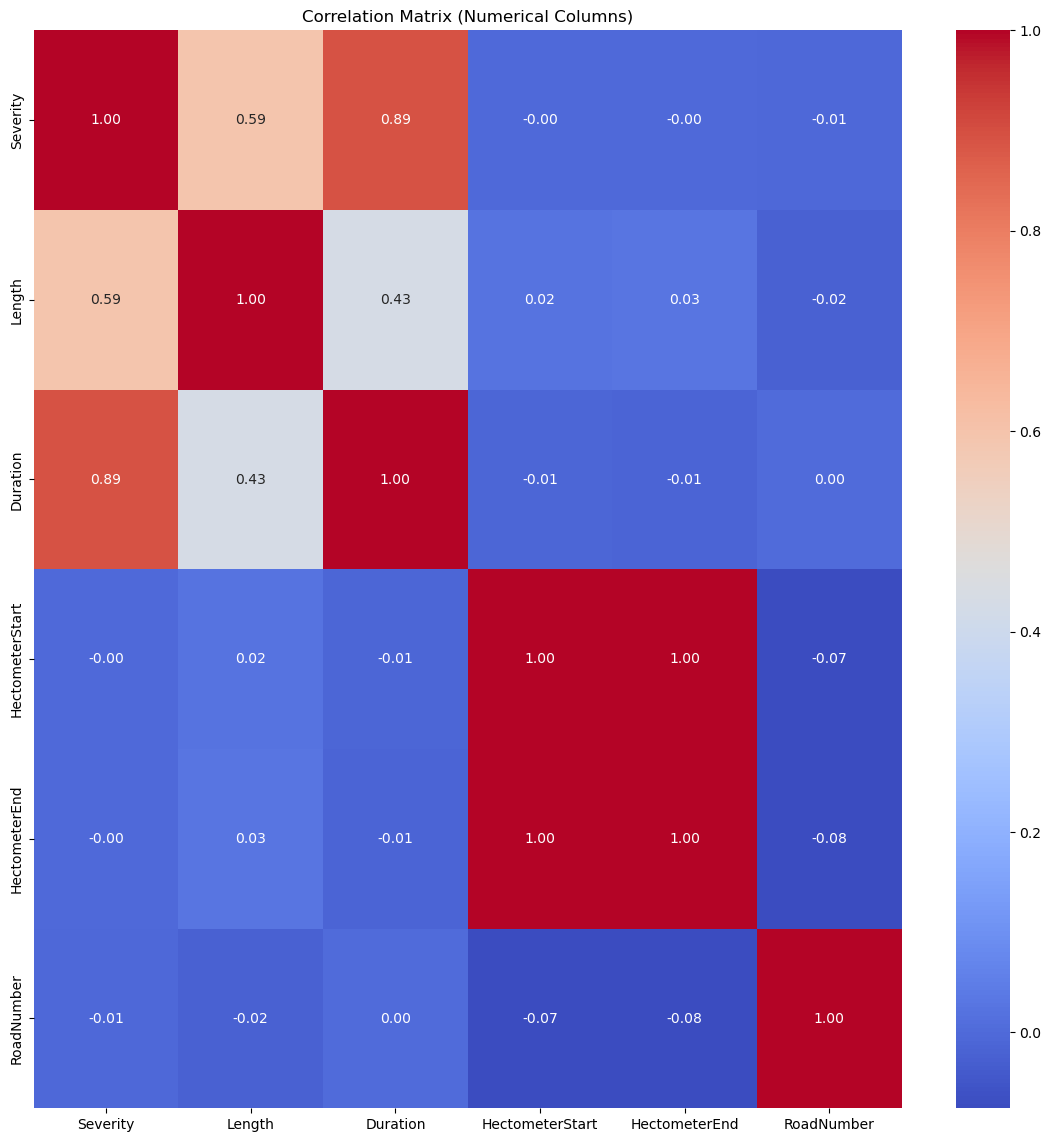

In [34]:
import matplotlib.pyplot as plt
# Selecting only the numerical columns
numerical_columns = traffic_jam.select_dtypes(include=['int64', 'float64', 'int32'])

correlation_matrix = numerical_columns.corr()

plt.figure(figsize=(14, 14))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix (Numerical Columns)')
plt.show()

## Exporting the clean dataframe to a csv file

In [36]:
traffic_jam.to_csv("datasets/CleanTraffic.csv", index=False)